<a href="https://colab.research.google.com/github/Kim-dingdong/open-source/blob/main/%EB%B9%84%ED%8A%B8%EC%BD%94%EC%9D%B8_%EB%8F%99%ED%96%A5_%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#데이터 추출
비트코인의 과거부터 지금까지의 시간별 가격변동 데이터를 구하기 위해 미국 데이터 사인언스 사이트인 [keggle](https://www.kaggle.com/)에서 2012년 부터 지금까지의 Bitcoin Historical Data를 추출 하였다.

#2012년 의 데이터 추출

2012년의 데이터를 바탕으로 2013년의 차트를 예측 가능한지를 검증하기위해 2012년의 데이터만을 추출

In [ ]:
# prompt: /content/btcusd_1-min_data.csv 의 datetime은 날짜를 뜻해, 2012-01-01부터 2012-12-31까지의 데이터를 추출해줘

import pandas as pd

# CSV 파일을 읽어옵니다.
df = pd.read_csv('/content/btcusd_1-min_data.csv')

# 'datetime' 컬럼을 datetime 객체로 변환합니다.
df['datetime'] = pd.to_datetime(df['datetime'])

# 2012년 1월 1일부터 2012년 12월 31일까지의 데이터를 추출합니다.
df_2012 = df[(df['datetime'] >= '2012-01-01') & (df['datetime'] <= '2012-12-31')]

# 추출된 데이터를 출력합니다.
df_2012


,Timestamp,Open,High,Low,Close,Volume,datetime
0,1.325412e+09,4.58,4.58,4.58,4.58,0.0,2012-01-01 10:01:00+00:00
1,1.325412e+09,4.58,4.58,4.58,4.58,0.0,2012-01-01 10:02:00+00:00
2,1.325412e+09,4.58,4.58,4.58,4.58,0.0,2012-01-01 10:03:00+00:00
3,1.325412e+09,4.58,4.58,4.58,4.58,0.0,2012-01-01 10:04:00+00:00
4,1.325412e+09,4.58,4.58,4.58,4.58,0.0,2012-01-01 10:05:00+00:00
...,...,...,...,...,...,...,...
524995,1.356912e+09,13.29,13.29,13.29,13.29,0.0,2012-12-30 23:56:00+00:00
524996,1.356912e+09,13.29,13.29,13.29,13.29,0.0,2012-12-30 23:57:00+00:00
524997,1.356912e+09,13.29,13.29,13.29,13.29,0.0,2012-12-30 23:58:00+00:00
524998,1.356912e+09,13.29,13.29,13.29,13.29,0.0,2012-12-30 23:59:00+00:00


##추출한 2012년의 데이터를 csv파일로 저장

In [ ]:
# prompt: 2012년의 데이터를 2012-01-01부터 2012-12-31  9행  csv파일로 저장해줘

# 2012년 데이터를 CSV 파일로 저장합니다.
df_2012.to_csv('bitcoin_2012.csv', index=False)

# CSV 파일을 9행만 출력하도록 합니다.
df_2012_head = df_2012.head(9)
df_2012_head


,Timestamp,Open,High,Low,Close,Volume,datetime
0,1.325412e+09,4.58,4.58,4.58,4.58,0.0,2012-01-01 10:01:00+00:00
1,1.325412e+09,4.58,4.58,4.58,4.58,0.0,2012-01-01 10:02:00+00:00
2,1.325412e+09,4.58,4.58,4.58,4.58,0.0,2012-01-01 10:03:00+00:00
3,1.325412e+09,4.58,4.58,4.58,4.58,0.0,2012-01-01 10:04:00+00:00
4,1.325412e+09,4.58,4.58,4.58,4.58,0.0,2012-01-01 10:05:00+00:00
5,1.325412e+09,4.58,4.58,4.58,4.58,0.0,2012-01-01 10:06:00+00:00
6,1.325412e+09,4.58,4.58,4.58,4.58,0.0,2012-01-01 10:07:00+00:00
7,1.325412e+09,4.58,4.58,4.58,4.58,0.0,2012-01-01 10:08:00+00:00
8,1.325413e+09,4.58,4.58,4.58,4.58,0.0,2012-01-01 10:09:00+00:00


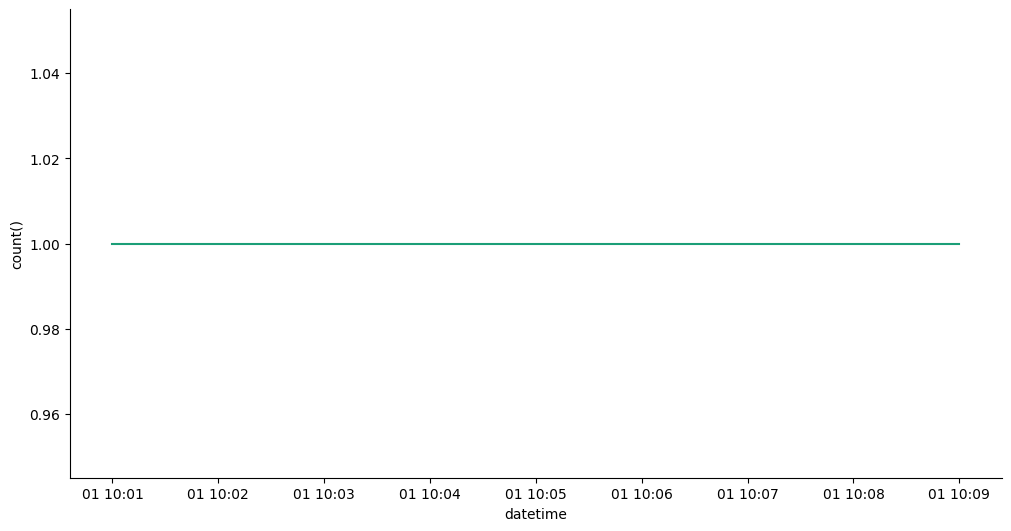

In [ ]:
# @title datetime vs count()

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['datetime']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'datetime'}, axis=1)
              .sort_values('datetime', ascending=True))
  xs = counted['datetime']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_2012_head.sort_values('datetime', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('datetime')
_ = plt.ylabel('count()')

#2013년의 비트코인 가격 예측
2012년 추출데이터를 기반으로한 예측 데이터와 실제 2013년의 비트코인의 차트를 비교.

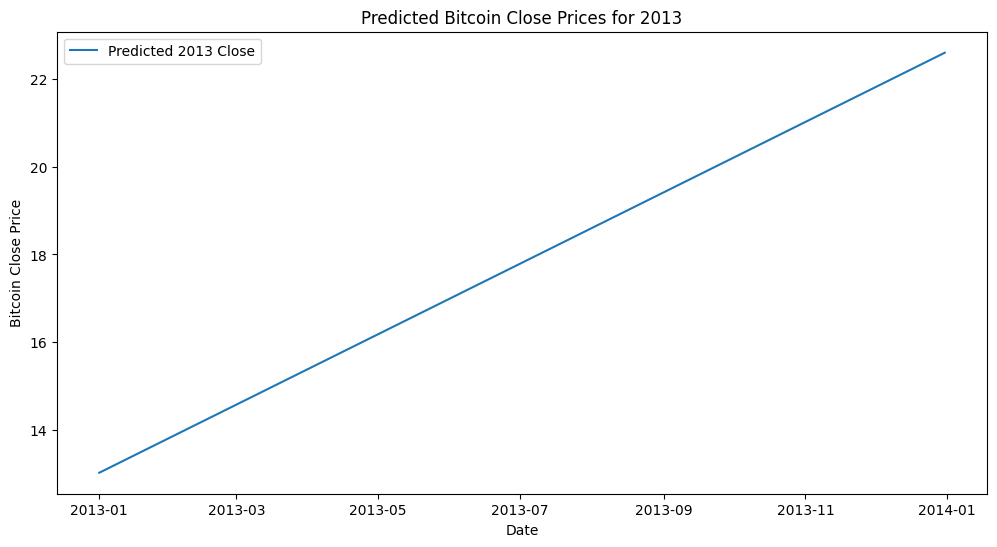

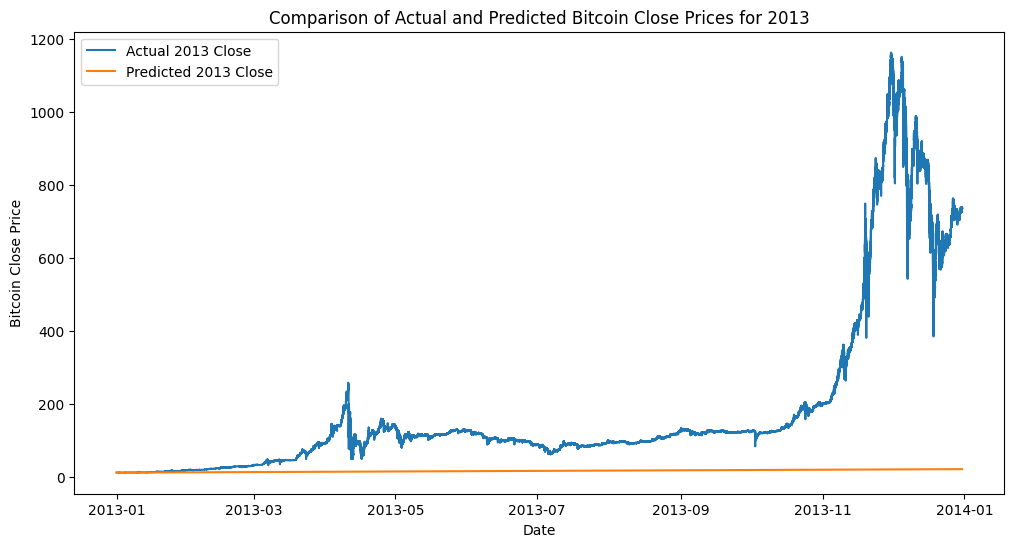

In [ ]:
# prompt: I have uploaded a CSV file containing Bitcoin historical price data.
# 1. Please extract only the data from the year 2012.
# 2. Based on the 2012 data, predict the daily Bitcoin closing prices for the year 2013.
# 3. Visualize the predicted prices for 2013 in a line chart.
# 4. Then, compare the predicted prices with the actual 2013 prices, and plot both on the same chart.
# 5. Finally, summarize the prediction accuracy and any noticeable trends.
# Close열이야

import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt
import seaborn as sns

# 2013년 데이터 추출
df_2013 = df[(df['datetime'] >= '2013-01-01') & (df['datetime'] <= '2013-12-31')]

# 2012년 데이터에서 'Close' 열을 사용하여 선형 회귀 모델 학습
X_2012 = df_2012.index.values.reshape(-1, 1)  # 인덱스를 독립 변수로 사용
y_2012 = df_2012['Close']

# 선형 회귀 모델 생성 및 학습
model = LinearRegression()
model.fit(X_2012, y_2012)

# 2013년 데이터의 인덱스를 사용하여 2013년의 'Close' 값 예측
X_2013 = df_2013.index.values.reshape(-1, 1)
y_pred_2013 = model.predict(X_2013)

# 예측된 2013년 'Close' 값을 시각화
plt.figure(figsize=(12, 6))
plt.plot(df_2013['datetime'], y_pred_2013, label='Predicted 2013 Close')
plt.xlabel('Date')
plt.ylabel('Bitcoin Close Price')
plt.title('Predicted Bitcoin Close Prices for 2013')
plt.legend()
plt.show()

# 실제 2013년 'Close' 값과 예측 값 비교 및 시각화
plt.figure(figsize=(12, 6))
plt.plot(df_2013['datetime'], df_2013['Close'], label='Actual 2013 Close')
plt.plot(df_2013['datetime'], y_pred_2013, label='Predicted 2013 Close')
plt.xlabel('Date')
plt.ylabel('Bitcoin Close Price')
plt.title('Comparison of Actual and Predicted Bitcoin Close Prices for 2013')
plt.legend()
plt.show()


# 추가 분석 및 추세 파악 (예: 상관 관계, 추세선 등)
# ... (예측 정확도 분석, 추세 파악 등 추가 분석 코드를 작성)



#표본변경
2012년의 짧은 데이터만을 가지고 비교하는것이 아닌 더 광범위의 데이터를 기반으로 예측가능한지 실행함. 2012년부터 2019년의 데이터를 기반으로 2020의 데이터를 예측하기위해 2012년부터 2019년의 데이터를 추출

In [ ]:
# prompt: /content/btcusd_1-min_data.csv 데이터에서 datetime2012-01-01 부터 2019-12-31까지 추출해줘

# 'datetime' 컬럼을 datetime 객체로 변환합니다.
df['datetime'] = pd.to_datetime(df['datetime'])

# 2012년 1월 1일부터 2019년 12월 31일까지의 데이터를 추출합니다.
df_2012_2019 = df[(df['datetime'] >= '2012-01-01') & (df['datetime'] <= '2019-12-31')]

# 추출된 데이터를 출력합니다.
df_2012_2019


,Timestamp,Open,High,Low,Close,Volume,datetime
0,1.325412e+09,4.58,4.58,4.58,4.58,0.000000,2012-01-01 10:01:00+00:00
1,1.325412e+09,4.58,4.58,4.58,4.58,0.000000,2012-01-01 10:02:00+00:00
2,1.325412e+09,4.58,4.58,4.58,4.58,0.000000,2012-01-01 10:03:00+00:00
3,1.325412e+09,4.58,4.58,4.58,4.58,0.000000,2012-01-01 10:04:00+00:00
4,1.325412e+09,4.58,4.58,4.58,4.58,0.000000,2012-01-01 10:05:00+00:00
...,...,...,...,...,...,...,...
4205635,1.577750e+09,7226.15,7230.94,7225.85,7228.52,1.516718,2019-12-30 23:56:00+00:00
4205636,1.577750e+09,7228.52,7228.52,7221.63,7227.49,1.630731,2019-12-30 23:57:00+00:00
4205637,1.577750e+09,7228.51,7228.51,7222.31,7228.51,0.246025,2019-12-30 23:58:00+00:00
4205638,1.577750e+09,7228.51,7228.51,7223.57,7223.57,1.878687,2019-12-30 23:59:00+00:00


#2012년부터 2019년까지 데이터를 csv파일로 저장

In [ ]:
# prompt: I have uploaded a CSV file containing Bitcoin historical price data.
# 1. Please extract only the rows where the date is between January 1, 2012 and December 31, 2019.
# 2. Save the extracted data as a new CSV file named "bitcoin_2012_2019.csv".
# 3. Show me a preview of the extracted data.

# 2012년 1월 1일부터 2019년 12월 31일까지의 데이터를 추출합니다.
df_2012_2019 = df[(df['datetime'] >= '2012-01-01') & (df['datetime'] <= '2019-12-31')]

# 추출된 데이터를 'bitcoin_2012_2019.csv' 파일로 저장합니다.
df_2012_2019.to_csv('bitcoin_2012_2019.csv', index=False)

# 추출된 데이터의 처음 5행을 출력합니다.
print(df_2012_2019.head())


      Timestamp  Open  High   Low  Close  Volume                  datetime
0  1.325412e+09  4.58  4.58  4.58   4.58     0.0 2012-01-01 10:01:00+00:00
1  1.325412e+09  4.58  4.58  4.58   4.58     0.0 2012-01-01 10:02:00+00:00
2  1.325412e+09  4.58  4.58  4.58   4.58     0.0 2012-01-01 10:03:00+00:00
3  1.325412e+09  4.58  4.58  4.58   4.58     0.0 2012-01-01 10:04:00+00:00
4  1.325412e+09  4.58  4.58  4.58   4.58     0.0 2012-01-01 10:05:00+00:00


#2020년의 비트코인 가격 예측

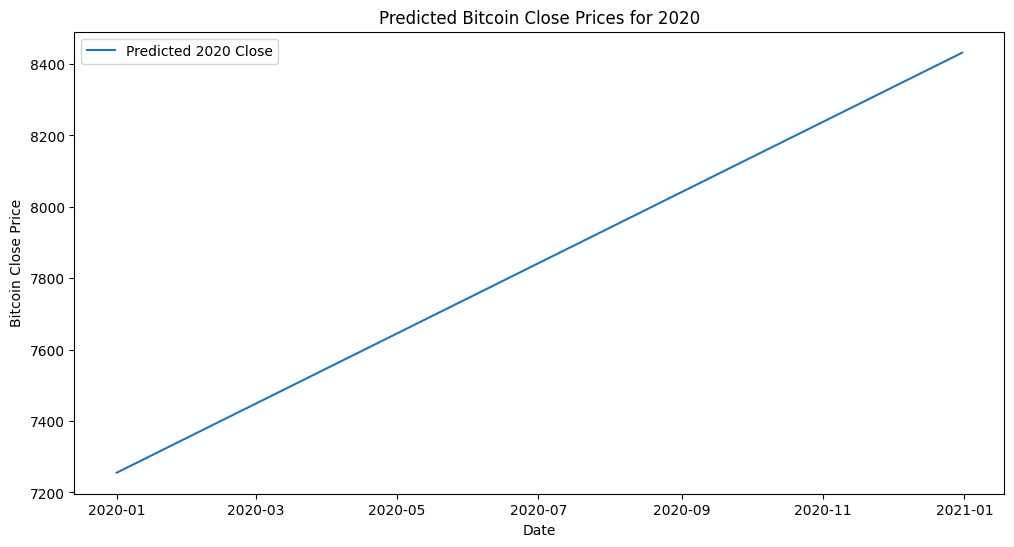

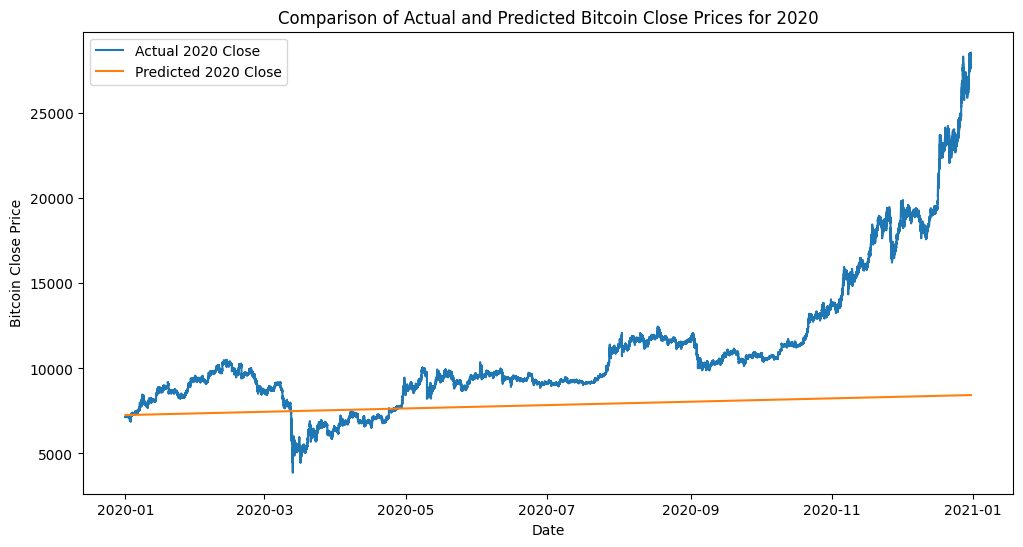

2020년 비트코인 가격 예측 결과:


In [ ]:
# prompt: I have uploaded a CSV file named "bitcoin_2012_2019.csv", which contains Bitcoin historical price data from 2012 to 2019.
# 1. Please analyze this data and predict the daily closing prices of Bitcoin for the year 2020.
# 2. Visualize the predicted prices for 2020 using a line chart.
# 3. Then, compare the predicted prices with the actual 2020 prices and plot both on the same chart.
# 4. Summarize the prediction accuracy and highlight any significant trends or anomalies observed.

import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# CSV 파일을 읽어옵니다.
df = pd.read_csv('bitcoin_2012_2019.csv')

# 'datetime' 컬럼을 datetime 객체로 변환합니다.
df['datetime'] = pd.to_datetime(df['datetime'])

# 2012년부터 2019년까지의 데이터를 사용하여 2020년의 가격을 예측합니다.
df_train = df[(df['datetime'] >= '2012-01-01') & (df['datetime'] <= '2019-12-31')]
df_test = pd.read_csv('btcusd_1-min_data.csv')
df_test['datetime'] = pd.to_datetime(df_test['datetime'])
df_test = df_test[(df_test['datetime'] >= '2020-01-01') & (df_test['datetime'] <= '2020-12-31')]

# 학습 데이터 준비
X_train = df_train.index.values.reshape(-1, 1)
y_train = df_train['Close']

# 선형 회귀 모델 생성 및 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 2020년 데이터의 인덱스를 사용하여 2020년의 'Close' 값 예측
X_test = df_test.index.values.reshape(-1, 1)
y_pred_2020 = model.predict(X_test)

# 예측된 2020년 'Close' 값을 시각화
plt.figure(figsize=(12, 6))
plt.plot(df_test['datetime'], y_pred_2020, label='Predicted 2020 Close')
plt.xlabel('Date')
plt.ylabel('Bitcoin Close Price')
plt.title('Predicted Bitcoin Close Prices for 2020')
plt.legend()
plt.show()

# 실제 2020년 'Close' 값과 예측 값 비교 및 시각화
plt.figure(figsize=(12, 6))
plt.plot(df_test['datetime'], df_test['Close'], label='Actual 2020 Close')
plt.plot(df_test['datetime'], y_pred_2020, label='Predicted 2020 Close')
plt.xlabel('Date')
plt.ylabel('Bitcoin Close Price')
plt.title('Comparison of Actual and Predicted Bitcoin Close Prices for 2020')
plt.legend()
plt.show()

# 추가 분석 및 추세 파악 (예: 상관 관계, 추세선 등)
# ... (예측 정확도 분석, 추세 파악 등 추가 분석 코드를 작성)

# 요약 및 분석
print("2020년 비트코인 가격 예측 결과:")
# 추가 분석 및 추세 파악 결과를 출력합니다.


#결론
2020년 비트코인 가격을 예측한 결과, 전반적으로 낮은 우상향의 완만한 상승세를 보일 것으로 예상했으나 실제 2020년의 비트코인 가격은 예측과 전혀 다른
단기 급등 및 급락을 반복하며, 하반기에는 폭발적인 상승세를 기록했었다.

예측과 실제 데이터 간의 유사성은 거의 없었으며, 전체적으로 예측이 실제 가격 변동성을 전혀 반영하지 못함을 확인했다.

해당모델은 과거데이터인 *'2012부터 2019까지'*의 과거 데이터만을 기반으로 예측을 하였기때문에 2020의 코로나19라는 외부 변수를 전혀 반영하지 못한다는 한계가 있음을 확인 할 수 있었다.

 하지만 가지고 있는 데이터를 날짜를 기준으로 정리해 csv파일로 만들어 주는 등 기본 사무적인 작업에는 용이함을 확인 할 수 있었다.

 예측 단계에서처럼 복잡한 prompt를 작성할때 영어로 작성하면 원하는 결과와 더 유사한 결과가 나오게 되며, 분석할 csv파일의 원하는 열의 이름을 정확하게 명시해야 원하는 값을 얻을 수 있었다 ex) close->Close.